In [1]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Perceptron
from sklearn . neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import sys
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.datasets import load_sample_image

# 1

In [2]:
df = keras.datasets.cifar10

# 2

In [7]:
(x_train, y_train), (x_test, y_test) = df.load_data()

# 3

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
print(dir(df))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'load_data']


In [12]:
classe = len(set(y_train.flatten()))
nbr_class = [len(y_train[y_train == i]) for i in range(classe)]

print('Nombre de classes:', classe)
print('Nombre échantillons par classe:', nbr_class)

Nombre de classes: 10
Nombre échantillons par classe: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


# 4

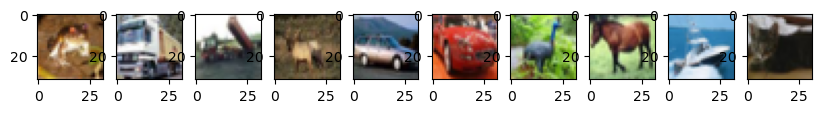

In [20]:
'''
plt.subplot(131)
plt.imshow(x_train[0])
plt.subplot(132)
plt.imshow(x_train[1])
plt.subplot(133)
plt.imshow(x_train[2])
plt.subplot(141)
plt.imshow(x_train[3])
plt.subplot(142)
plt.imshow(x_train[4])
plt.subplot(143)
plt.imshow(x_train[5])
plt.subplot(151)
plt.imshow(x_train[10])
plt.subplot(152)
plt.imshow(x_train[25])
plt.subplot(153)
plt.imshow(x_train[50])
plt.subplot(161)
plt.imshow(x_train[100])
plt.subplot(162)
'''

plt.figure(figsize=(10, 16))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])

plt.show()

# 5

In [21]:
x_train = x_train / 255
x_test = x_test / 255

# 6

In [24]:
mdl = tf.keras.Sequential([

    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(input_shape=[32, 32]),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 7

In [25]:
mdl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

In [26]:
mdl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model = mdl.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test));

Epoch 1/50
1563/1563 [==============================] - 74s 46ms/step - loss: 1.2950 - accuracy: 0.5513 - val_loss: 1.4239 - val_accuracy: 0.5457
Epoch 2/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8823 - accuracy: 0.6941 - val_loss: 1.0499 - val_accuracy: 0.6583
Epoch 3/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7076 - accuracy: 0.7540 - val_loss: 0.9737 - val_accuracy: 0.6618
Epoch 4/50
1563/1563 [==============================] - 71s 45ms/step - loss: 0.5787 - accuracy: 0.7984 - val_loss: 0.8259 - val_accuracy: 0.7288
Epoch 5/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4618 - accuracy: 0.8401 - val_loss: 0.9739 - val_accuracy: 0.7158
Epoch 6/50
1563/1563 [==============================] - 71s 46ms/step - loss: 0.3574 - accuracy: 0.8764 - val_loss: 1.0076 - val_accuracy: 0.7029
Epoch 7/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2872 - accuracy: 0.9022 - val_loss: 1.0772 -

# 9

In [27]:
y_pred = np.argmax(mdl.predict(x_test), axis=1)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

313/313 [==============================] - 3s 8ms/step
[[836  13  23  20  15   1   5  12  36  39]
 [ 16 879   3   4   1   1   8   3  11  74]
 [ 51  10 666  61  85  48  37  23   9  10]
 [ 20   7  41 618  62 145  48  33   7  19]
 [ 20   3  32  42 777  28  28  60   6   4]
 [ 11   2  25 129  48 702  16  51   6  10]
 [  5   2  26  57  35  17 839   4   5  10]
 [  9   2  11  25  36  41   2 857   2  15]
 [ 41  19   9   7   7   8   4  11 870  24]
 [ 15  56   6  10   3   9   0   9  15 877]]


il semble avoir de la difficulter de claser les oiseaux et les chats

# 10

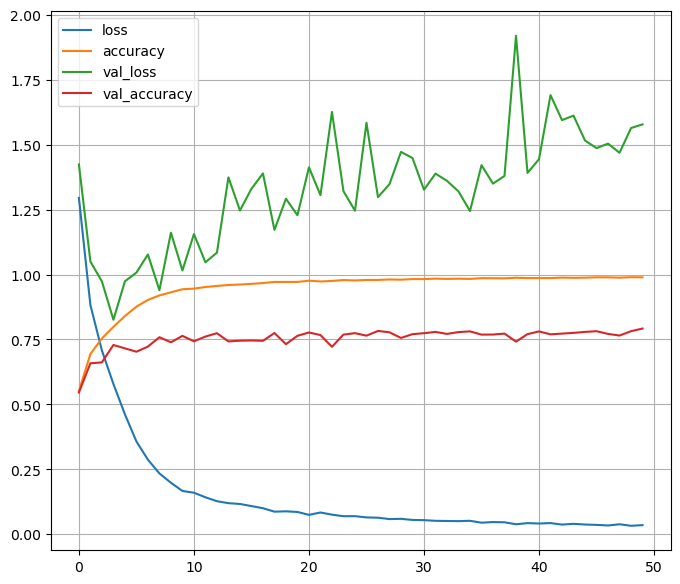

In [28]:
pd.DataFrame(model.history).plot(figsize=(8, 7))
plt.grid(True)
plt.show()

# 11

In [34]:
mdl_d = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3))
] + [
    tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal') for _ in range(10) 
] + [
    tf.keras.layers.Dense(10, activation='softmax')
])

# 12

In [35]:
mdl_d.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=5e-5), loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_d = mdl_d.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8658 - accuracy: 0.3271 - val_loss: 1.7109 - val_accuracy: 0.3850
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6589 - accuracy: 0.4031 - val_loss: 1.6414 - val_accuracy: 0.4140
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5795 - accuracy: 0.4326 - val_loss: 1.6371 - val_accuracy: 0.4151
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5249 - accuracy: 0.4545 - val_loss: 1.5274 - val_accuracy: 0.4552
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4827 - accuracy: 0.4704 - val_loss: 1.5111 - val_accuracy: 0.4582
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4499 - accuracy: 0.4804 - val_loss: 1.4936 - val_accuracy: 0.4691
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4196 - accuracy: 0.4921 - val_loss: 1.4705 - val_accuracy

# 13

In [36]:
y_pred_d = np.argmax(mdl_d.predict(x_test), axis=1)
confusion_d = confusion_matrix(y_test, y_pred_d)
print(confusion)

313/313 [==============================] - 0s 1ms/step
[[836  13  23  20  15   1   5  12  36  39]
 [ 16 879   3   4   1   1   8   3  11  74]
 [ 51  10 666  61  85  48  37  23   9  10]
 [ 20   7  41 618  62 145  48  33   7  19]
 [ 20   3  32  42 777  28  28  60   6   4]
 [ 11   2  25 129  48 702  16  51   6  10]
 [  5   2  26  57  35  17 839   4   5  10]
 [  9   2  11  25  36  41   2 857   2  15]
 [ 41  19   9   7   7   8   4  11 870  24]
 [ 15  56   6  10   3   9   0   9  15 877]]


comme le cnn il semble avoir de la difficulter de claser les oiseaux et les chats

# 14

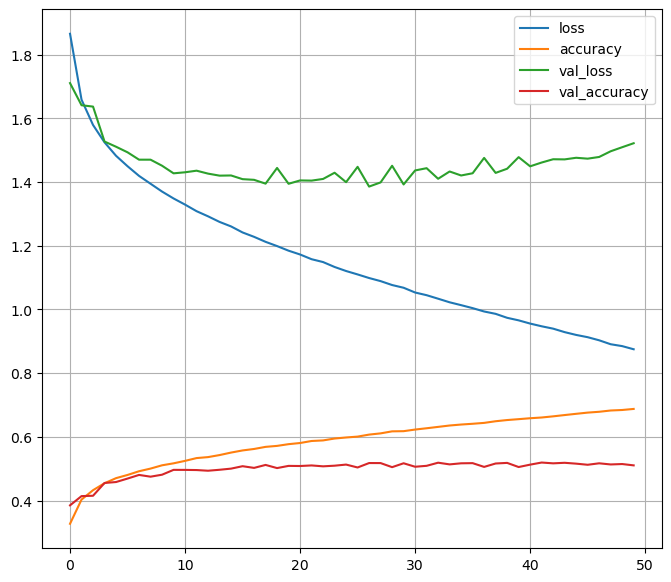

In [37]:
pd.DataFrame(model_d.history).plot(figsize=(8, 7))
plt.grid(True)
plt.show()

Le RNP dense est composé de couches complètement connectées. Il ne prend pas en compte la structure spatiale des données, contrairement au CNN qui le fait, il utilise les couches de convolution pour apprendre les motifs. Malgrer cela selon la matrice de confusion le resultat semble similaire.